# PROJECT ON CAB RENTAL PREDICTION


In [73]:
#Load libraries requied for EDA and Modelling.
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from random import randrange, uniform
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin

os.chdir("D:\Edwisor\project\Cab Fare Prediction")
os.getcwd()

'D:\\Edwisor\\project\\Cab Fare Prediction'

In [2]:
#Load training data for Exploratory Analysis
train=pd.read_csv("D:/Edwisor/project/Cab Fare Prediction/train_cab.csv")
train.head()

train.info()

test=pd.read_csv("D:/Edwisor/project/Cab Fare Prediction/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null object
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
dtypes: float64(6), object(1)
memory usage: 815.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 426.0+ KB


In [3]:
# Convert fare_amount from non-null object to float ; and passenger_count from float to integer;

train['fare_amount'] = train['fare_amount'].astype(float)


In [4]:
# MISSING VALUE ANALYSIS


In [5]:

#Create dataframe with missing percentage in test data.

missing_val = pd.DataFrame(train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

missing_val

,Variables,Missing_percentage
0,passenger_count,0.342338
1,fare_amount,0.149384
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [6]:
# check for missing values in test data
missing_val_1 = pd.DataFrame(test.isnull().sum())
missing_val_1

#no missing values

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [7]:
# since there are missing values in the data set we will impoute the values with median. 
# we are median imputation because some the values are ver high in the data set which would definitely affect the imputation.
#Impute with median
train['passenger_count'] = train['passenger_count'].fillna(train['passenger_count'].median())
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].median())





C:\Users\annu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Trip Fare')

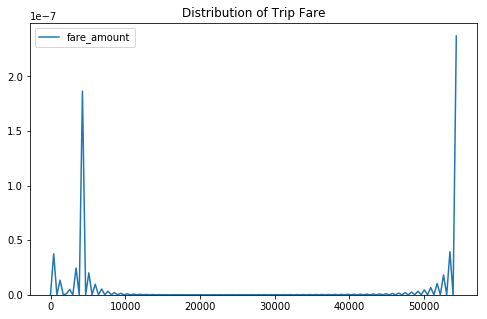

In [8]:
#Distribution of Trip Fare
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare_amount']).set_title("Distribution of Trip Fare")

# we cancheck that there are some negative values as well as some very high values both of which is not possible 


In [9]:
# OUTLIER ANALYSIS

In [10]:
# calculate the number of such values.
#negative values
train.loc[train['fare_amount']<0].shape  #(there are 3 such values we can remove them.)
train=train.loc[train['fare_amount']>=0]
train.shape


(16063, 7)

In [11]:
# very high fares (more than 500) are unlikely therefore removing those items too.
train.loc[train['fare_amount']>500].shape #(there are 2 such values we can remove them.)
train=train.loc[train['fare_amount']<=500]
train.shape


(16061, 7)

C:\Users\annu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

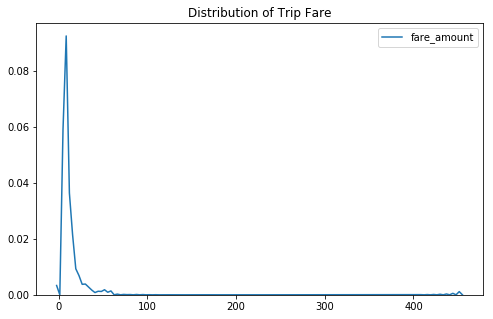

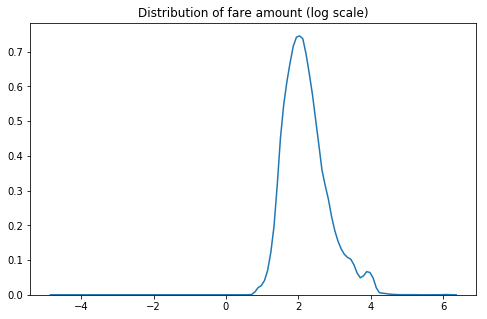

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare_amount']).set_title("Distribution of Trip Fare")
# we can see the change in the graph but the graph is little skewed therefore we will plot a logarithmic curve for it.

plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['fare_amount'].values)).set_title("Distribution of fare amount (log scale)")

# it is normally distributed now. 


In [13]:
# checking for passenger_count
train['passenger_count'].describe()
# minimum count is 0 and maximum count is 5345 which is not possible therefore we need to delete such values, since it is a can we can assume 
#that it will not accomodate more than 6 person.
train.loc[train['passenger_count']>6].shape #therre are 6 such data sets we can getrid of these data sets.
train=train.loc[train['passenger_count']<=6]
train.shape

(16041, 7)

In [14]:
##check in test data
test['passenger_count'].describe()

# no outliers present (count    9914.000000
#mean        1.671273
#std         1.278747
#min         1.000000
#25%         1.000000
#50%         1.000000
#75%         2.000000
#max         6.000000
#Name: passenger_count, dtype: float64)

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [15]:
# check for pickup and drop off latitutes and longitudes.
print("Range of Pickup Latitude is ", (min(train['pickup_latitude']),max(train['pickup_latitude'])))
print("Range of Dropoff Latitude is ", (min(train['dropoff_latitude']),max(train['dropoff_latitude'])))
print("Range of Pickup Longitude is ", (min(train['pickup_longitude']),max(train['pickup_longitude'])))
print("Range of Dropoff Longitude is ", (min(train['dropoff_longitude']),max(train['dropoff_longitude'])))

##Range of Pickup Latitude is  (-74.006893, 401.083332)
#Range of Dropoff Latitude is  (-74.006377, 41.366138)
#Range of Pickup Longitude is  (-74.438233, 40.766125)
#Range of Dropoff Longitude is  (-74.42933199999999, 40.802437)
# we can see that that all the values are near to ecah other also looking at the csv file we have we can 
#infer that the values have been interchanged there fore we can drop those values
# from the csv file using the filters we can the range for which the maximum data are present for pickup latitude,
#drop off latitude ,etc and we can drop the rest of the values.

train = train.drop(((train[train['pickup_latitude']<39.601])|(train[train['pickup_latitude']>41.367])).index, axis=0)
train = train.drop(((train[train['pickup_longitude']<-74.438])|(train[train['pickup_longitude']>-73.137])).index, axis=0)
train = train.drop(((train[train['dropoff_latitude']<39.604])|(train[train['dropoff_latitude']>41.366])).index, axis=0)
train = train.drop(((train[train['dropoff_longitude']<-74.429])|(train[train['dropoff_longitude']>-73.137])).index, axis=0)

train.info()
# Now we have cleared the data there are no outliers no missing values in our data set.


Range of Pickup Latitude is  (-74.006893, 401.083332)
Range of Dropoff Latitude is  (-74.006377, 41.366138)
Range of Pickup Longitude is  (-74.438233, 40.766125)
Range of Dropoff Longitude is  (-74.42933199999999, 40.802437)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15696 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15696 non-null float64
pickup_datetime      15696 non-null object
pickup_longitude     15696 non-null float64
pickup_latitude      15696 non-null float64
dropoff_longitude    15696 non-null float64
dropoff_latitude     15696 non-null float64
passenger_count      15696 non-null float64
dtypes: float64(6), object(1)
memory usage: 919.7+ KB


In [16]:
# check in test data
print("Range of Pickup Latitude is ", (min(test['pickup_latitude']),max(test['pickup_latitude'])))
print("Range of Dropoff Latitude is ", (min(test['dropoff_latitude']),max(test['dropoff_latitude'])))
print("Range of Pickup Longitude is ", (min(test['pickup_longitude']),max(test['pickup_longitude'])))
print("Range of Dropoff Longitude is ", (min(test['dropoff_longitude']),max(test['dropoff_longitude'])))
# no outliers present in this data too.


Range of Pickup Latitude is  (40.573143, 41.709555)
Range of Dropoff Latitude is  (40.568973, 41.696683)
Range of Pickup Longitude is  (-74.252193, -72.986532)
Range of Dropoff Longitude is  (-74.263242, -72.990963)


In [17]:
# pickup_datetime seem to be datetime columns which are in object format. Let's convert it to datetime
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
train.dtypes

#also to be converted in test data.
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [18]:
#Create datetime features based on pickup_datetime
train['pickup_date']= train['pickup_datetime'].dt.date
train['pickup_day']=train['pickup_datetime'].apply(lambda x:x.day)
train['pickup_hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['pickup_day_of_week']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['pickup_month']=train['pickup_datetime'].apply(lambda x:x.month)
train['pickup_year']=train['pickup_datetime'].apply(lambda x:x.year)



#changes to be done in test file too.
test['pickup_date']= test['pickup_datetime'].dt.date
test['pickup_day']=test['pickup_datetime'].apply(lambda x:x.day)
test['pickup_hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['pickup_day_of_week']=test['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test['pickup_month']=test['pickup_datetime'].apply(lambda x:x.month)
test['pickup_year']=test['pickup_datetime'].apply(lambda x:x.year)

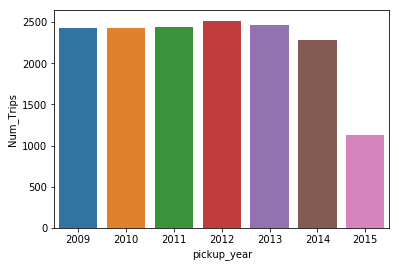

In [19]:
#Let us now look at datetime features and their realtionship with Fare Amount
#What is the time period in out sample

trips_year=train.groupby(['pickup_year'])['passenger_count'].count().reset_index().rename(columns={'passenger_count':'Num_Trips'})
trips_year.head()
sns.barplot(x='pickup_year',y='Num_Trips',data=trips_year)
# maximum number of trips generated in the year 2012.

Text(0.5, 1.0, 'Avg Fare Amount over Years')

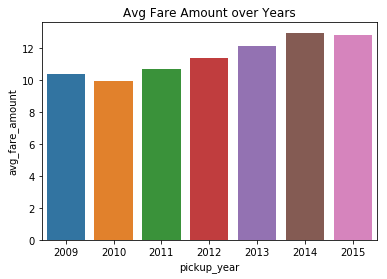

In [20]:
#Average fair amount over the years 
trips_year_fareamount=train.groupby(['pickup_year'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})
sns.barplot(x='pickup_year',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over Years")
# the average fair amount has been increasing per year.


Text(0.5, 1.0, 'Avg Fare Amount over Months')

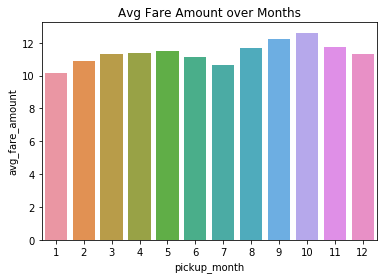

In [21]:
# Pickup month vs mean fare amount.

trips_year_fareamount=train.groupby(['pickup_month'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})
sns.barplot(x='pickup_month',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over Months")

## maximum fare in the month of october.


Text(0.5, 1.0, 'Avg Fare Amount over weekdays')

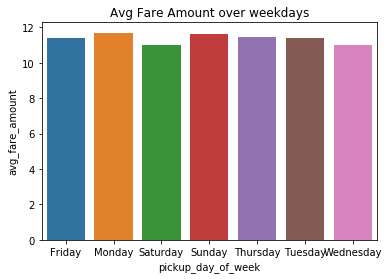

In [22]:
#Pickup day of the week and fare amount.
trips_year_fareamount=train.groupby(['pickup_day_of_week'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})
sns.barplot(x='pickup_day_of_week',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over weekdays")

# there is as such not a huge difference in the fares ; weekdays do not effect the fare amount muuch.


Text(0.5, 1.0, 'Avg Fare Amount over hours of the day')

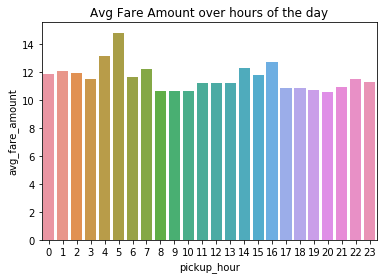

In [23]:
#Pickup hour and fare amount.
trips_year_fareamount=train.groupby(['pickup_hour'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})
sns.barplot(x='pickup_hour',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over hours of the day")


Text(0.5, 1.0, 'Avg Fare Amount over number of passengers')

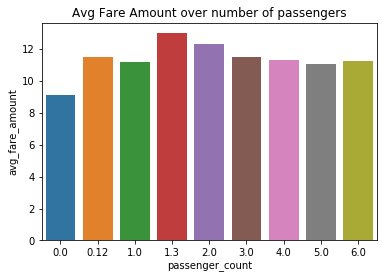

In [24]:
#Number of Passengers and fare amount.
trips_year_fareamount=train.groupby(['passenger_count'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})
sns.barplot(x='passenger_count',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over number of passengers")


In [25]:
# To calculate fares over the distance we need to convert the given latitudes and longitudes into distance using suitable 
#distance formula. Here we are using Haversine formula.
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d


haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [26]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,H_Distance
10709,3.70,2011-02-11 21:46:09,-73.955411,39.604164,-73.955647,40.772837,1.0,2011-02-11,11,21,Friday,2,2011,129.950482
14535,4.10,2011-04-03 12:16:46,-73.982155,40.775187,-73.976399,39.610030,1.0,2011-04-03,3,12,Sunday,4,2011,129.560455
11618,11.30,2011-05-27 21:47:44,-73.945106,39.603178,-73.976636,40.749643,1.0,2011-05-27,27,21,Friday,5,2011,127.509261
12227,16.50,2011-04-26 23:18:56,-73.993360,40.721749,-73.977370,39.610604,2.0,2011-04-26,26,23,Tuesday,4,2011,123.561157
5662,49.15,2009-02-25 07:05:05,-73.137393,41.366138,-74.000940,40.731723,1.0,2009-02-25,25,7,Wednesday,2,2009,101.094619
1683,2.50,2009-05-02 19:01:01,-73.137393,41.366138,-73.996510,40.745320,2.0,2009-05-02,2,19,Saturday,5,2009,99.771579
3074,6.90,2009-01-06 10:53:36,-73.137393,41.366138,-73.974598,40.751311,1.0,2009-01-06,6,10,Tuesday,1,2009,97.985088
4486,4.90,2009-08-26 07:43:16,-73.137393,41.366138,-73.957685,40.765644,1.0,2009-08-26,26,7,Wednesday,8,2009,95.852036
9807,6.90,2009-08-13 23:15:28,-73.137393,41.366138,-73.952331,40.786380,1.0,2009-08-13,13,23,Thursday,8,2009,93.925599
12348,104.67,2010-05-01 15:23:00,-73.797225,40.639720,-73.840545,41.030892,1.0,2010-05-01,1,15,Saturday,5,2010,43.648755


In [27]:
# Let us encode day of the week to numbers
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]
train['pickup_day_of_week']=train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [28]:
test['pickup_day_of_week']=test['pickup_day_of_week'].apply(lambda x:encodeDays(x))
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,H_Distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27,27,13,2,1,2015,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27,27,13,2,1,2015,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08,8,11,6,10,2011,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01,1,21,6,12,2012,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01,1,21,6,12,2012,5.387301


In [29]:
train.dtypes
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,H_Distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15,15,17,1,6,2009,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05,5,16,2,1,2010,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18,18,0,4,8,2011,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21,21,4,6,4,2012,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09,9,7,2,3,2010,1.999157


C:\Users\annu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5, 1.0, 'Distribution of Trip Distance (log)')

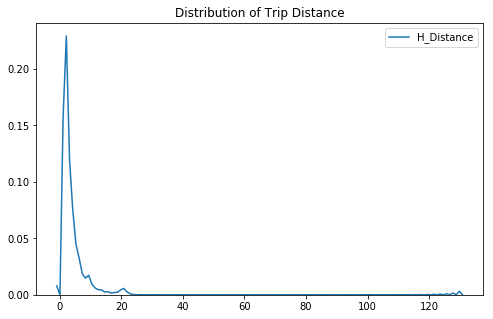

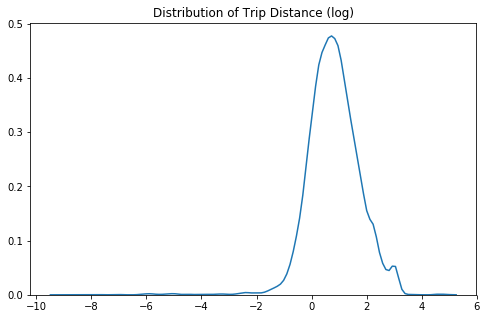

In [30]:
# check weather the distance is normally distributed or not.
plt.figure(figsize=(8,5))
sns.kdeplot(train['H_Distance']).set_title("Distribution of Trip Distance")
# we can see the change in the graph but the graph is little skewed therefore we will plot a logarithmic curve for it.

plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['H_Distance'].values)).set_title("Distribution of Trip Distance (log)")


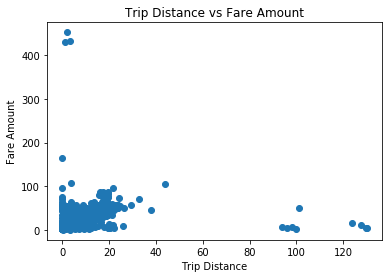

In [31]:
## plot realtionship between cab fare and the distance covered.
plt.scatter(x=train['H_Distance'],y=train['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

# it is clearly evident from the figure that fares for very long distance are very low therefore there are chances
#of garbage data as it is not possible we can drop these data points as well.
# also remove data sets with very high fares (>300) as it is verry unlikely for such short distance.

train.loc[train['H_Distance']>80].shape # there are 9 such data sets we can drop them.
train=train.loc[train['H_Distance']<=80]
train=train.loc[train['fare_amount']<=300]

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

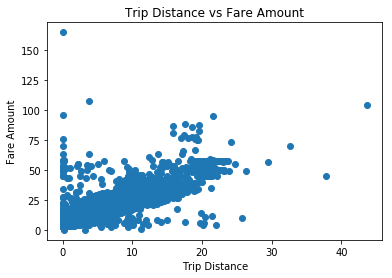

In [32]:
# our new scatter plot will be:
plt.scatter(x=train['H_Distance'],y=train['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

In [33]:
## Feature selection 

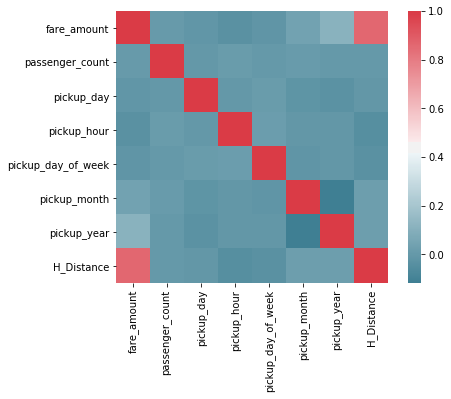

In [34]:
#save numeical names
cnames =  ["fare_amount", "passenger_count", "pickup_day", "pickup_date", "pickup_hour", "pickup_day_of_week", "pickup_month", "pickup_year",
           "H_Distance"]
##Correlation analysis
#Correlation plot
train_corr = train.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = train_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# with the figure it is evident that all the variables are positively corrrrelated to each other
# and none of them is highly correlated to the independent variables,, therefore we will have to condiser all the independent variable.

# Modelling

In [70]:
X = train.drop(['fare_amount','pickup_datetime','pickup_date'],axis=1)
y = train['fare_amount']

In [71]:
#Split train set into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Drop columns from test dataset we're not going to use
test_pred = test.drop(['pickup_datetime','pickup_date'],axis=1)

In [37]:
##LINEAR REGESSION MODEL
#Initilise a linear regression model, fit the data and get scores
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.7573114950538957
0.7630316704972073


In [38]:
#Predict fares and get a rmse for them
y_pred = lm.predict(X)
lrmse = np.sqrt(metrics.mean_squared_error(y_pred, y))
lrmse
#4.663127011970703 whcih is quite good

4.663127011970703

In [41]:
#Predict final fares for test data
LinearPredictions = lm.predict(test_pred)
LinearPredictions = np.round(LinearPredictions, decimals=2)
LinearPredictions


array([10.48, 10.01,  5.4 , ..., 48.94, 22.74,  7.24])

In [ ]:

#Set up predictions for a submittable dataframe
linear_submission = pd.DataFrame({"fare_amount": LinearPredictions},columns = ['fare_amount'])
linear_submission


In [64]:
##DECISION TREE REGRESSOR
fit_DT = DecisionTreeRegressor(max_depth=8)
fit_DT.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
#Predict fares and get a rmse for them
predictions_DT = fit_DT.predict(X)
lrmse = np.sqrt(metrics.mean_squared_error(predictions_DT, y))
lrmse
#3.4871212085852865 better than linear regression model.

3.4871212085852865

In [69]:
#Predict final fares for test data
DT_Predictions = fit_DT.predict(test_pred)
DT_Predictions = np.round(DT_Predictions, decimals=2)

#Set up predictions for a submittable dataframe
DT_submission = pd.DataFrame({"fare_amount": DT_Predictions},columns = ['fare_amount'])
DT_submission


,fare_amount
0,9.54
1,9.54
2,5.42
3,7.89
4,13.39
5,10.62
6,5.42
7,47.77
8,10.92
9,5.42


In [81]:
### RANDOM FOREST

rf = RandomForestRegressor(n_estimators = 100, random_state = 800,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(metrics.mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)

##RMSE for Random Forest is  4.148241041585081. Multiple linear regression and decision tree form better modelling technique.


RMSE for Random Forest is  4.187533080652855


In [83]:
#Predict final fares for test data
RF_Predictions = rf.predict(test_pred)
RF_Predictions = np.round(RF_Predictions, decimals=2)

#Set up predictions for a submittable dataframe
RF_Predictions = pd.DataFrame({"fare_amount": RF_Predictions},columns = ['fare_amount'])
RF_Predictions





,fare_amount
0,10.48
1,10.19
2,4.29
3,9.82
4,17.77
5,10.60
6,5.26
7,45.82
8,11.40
9,7.08


In [ ]:
### Decision tree is the best model for prediction of CAB FARE.
